<a href="https://colab.research.google.com/github/Reddy0402/VOIS_AICTE_Oct2025_MajorProject_VSAITEJAREDDY/blob/main/Majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import requests

url = 'https://drive.google.com/uc?export=download&id=1fIXf3KpWZAyXq_t_crt-0suSodcjZd4o'
destination = 'Dataset.csv'

try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes

    with open(destination, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    print(f"Dataset downloaded successfully to {destination}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the dataset: {e}")

Dataset downloaded successfully to Dataset.csv


In [23]:
import pandas as pd

df = pd.read_csv('Dataset.csv')
display(df.tail(5))

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


# Task
Analyze the Netflix content dataset from "https://drive.google.com/file/d/1fIXf3KpWZAyXq_t_crt-0suSodcjZd4o/view?usp=drive_link" to understand content trends, including the distribution of Movies vs. TV Shows over the years, the most common genres and their popularity changes, and country-wise contributions. Based on the analysis, provide strategic recommendations for Netflix's content strategy.

## Data preprocessing

### Subtask:
Handle missing values and convert the 'Release_Date' column to datetime objects.


**Reasoning**:
I will identify missing values in the DataFrame and handle them by dropping rows where 'Director' or 'Cast' are missing, as these are critical for content analysis. I will fill missing 'Country' values with 'Unknown'. Then, I will convert the 'Release_Date' column to datetime objects.



In [24]:
df = df.dropna(subset=['Director', 'Cast']).copy()
df['Country'] = df['Country'].fillna('Unknown')

df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df.dropna(subset=['Release_Date'], inplace=True)

print(df.isnull().sum())
display(df.head())

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          4
Duration        0
Type            0
Description     0
dtype: int64


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


## Analyze content distribution

### Subtask:
Analyze the distribution of Movies vs. TV Shows over the years.


**Reasoning**:
Group the data by category and year, count the occurrences, reset the index, and rename the count column as per the instructions.



In [31]:
df['Release_Year'] = df['Release_Date'].dt.year
category_year_distribution = df.groupby(['Category', 'Release_Year']).size().reset_index(name='Count')
display(category_year_distribution.head())


,Category,Release_Year,Count
0,Movie,2008,1
1,Movie,2009,2
2,Movie,2010,1
3,Movie,2011,13
4,Movie,2012,3


## Analyze genre trends

### Subtask:
Identify the most common genres and analyze how their popularity has changed over time.


**Reasoning**:
Extract individual genres from the 'Type' column, create a new DataFrame with each genre on a separate row along with 'Release_Year' and 'Category', and then group and count the occurrences of each genre per year and category.



In [30]:
genres = df['Type'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='Genre')
genres = genres.join(df[['Release_Year', 'Category']])
genre_distribution = genres.groupby(['Category', 'Release_Year', 'Genre']).size().reset_index(name='Count')
genre_distribution_sorted = genre_distribution.sort_values(by=['Category', 'Release_Year', 'Count'], ascending=[True, True, False])
display(genre_distribution_sorted.head())

,Category,Release_Year,Genre,Count
0,Movie,2008,Dramas,1
1,Movie,2008,Independent Movies,1
2,Movie,2008,Thrillers,1
3,Movie,2009,Dramas,1
4,Movie,2009,Horror Movies,1


from matplotlib import pyplot as plt
_df_21['Release_Year'].plot(kind='hist', bins=20, title='Release_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release_Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release_Year'}, axis=1)
              .sort_values('Release_Year', ascending=True))
  xs = counted['Release_Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('Release_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release_Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Count'}, axis=1)
              .sort_values('Count', ascending=True))
  xs = counted['Count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Genre')):
  _plot_series(series, series_name, i)
  fig.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_25['Release_Year'].plot(kind='line', figsize=(8, 4), title='Release_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Genre'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Release_Year', y='Genre', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Analyze country contributions

### Subtask:
Compare country-wise contributions to Netflix’s catalog.


**Reasoning**:
Extract individual countries, create a new DataFrame, group by country, count occurrences, sort, and display the top 10.



In [27]:
countries = df['Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame(name='Country')
country_counts = countries.groupby('Country').size().reset_index(name='Content_Count')
country_counts_sorted = country_counts.sort_values(by='Content_Count', ascending=False)
display(country_counts_sorted.head(10))

,Country,Content_Count
98,United States,2184
37,India,891
97,United Kingdom,425
15,Canada,263
28,France,254
99,Unknown,167
88,Spain,147
30,Germany,143
45,Japan,108
18,China,98


from matplotlib import pyplot as plt
_df_19['Content_Count'].plot(kind='hist', bins=20, title='Content_Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Content_Count'].plot(kind='line', figsize=(8, 4), title='Content_Count')
plt.gca().spines[['top', 'right']].set_visible(False)

## Visualize findings

### Subtask:
Create visualizations to illustrate the key findings from the analysis.


**Reasoning**:
Create the requested visualizations to illustrate the content trends.



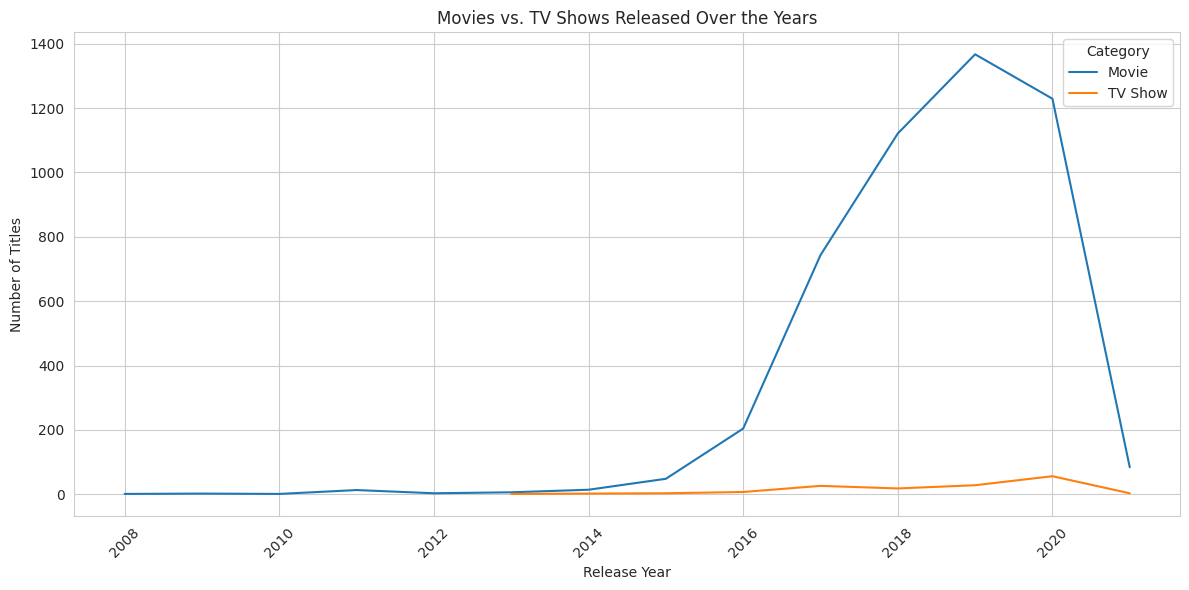

/tmp/ipython-input-704730227.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts_sorted.head(10), x='Country', y='Content_Count', palette='viridis')


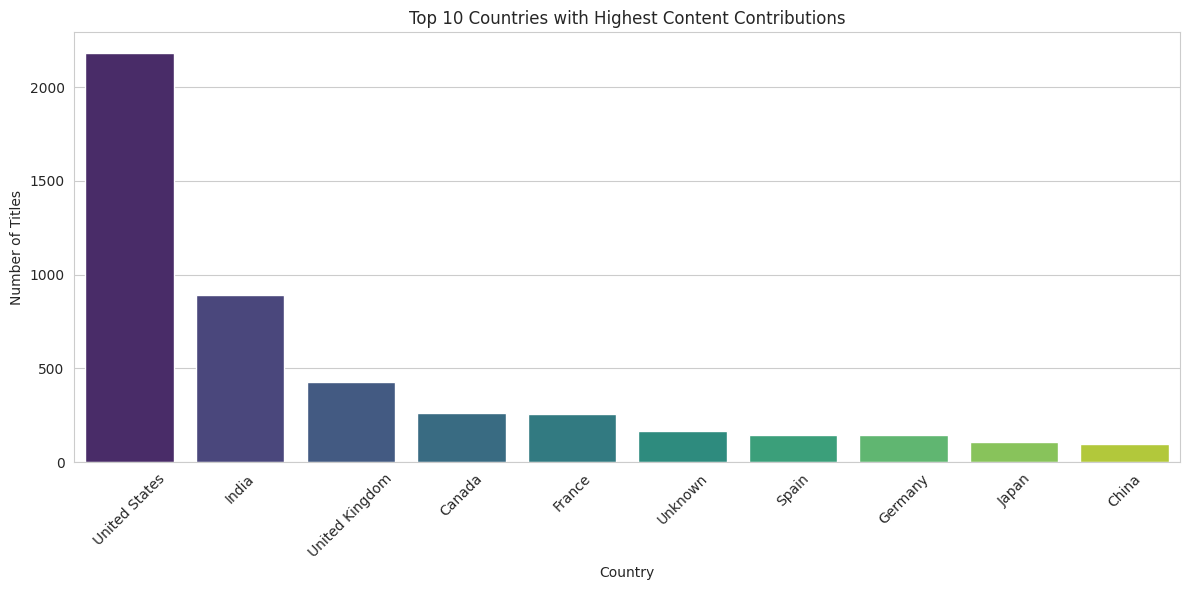

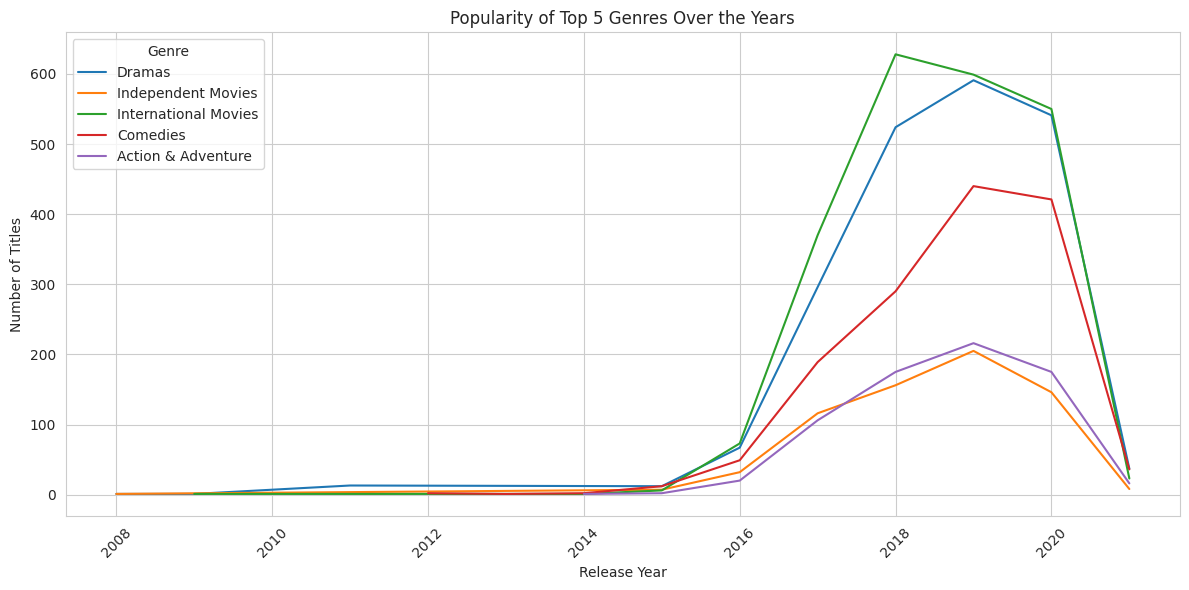

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# 1. Line plot for Movies vs. TV Shows over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_year_distribution, x='Release_Year', y='Count', hue='Category')
plt.title('Movies vs. TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Bar plot for top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts_sorted.head(10), x='Country', y='Content_Count', palette='viridis')
plt.title('Top 10 Countries with Highest Content Contributions')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Line plot for top 5 genres over the years
# Identify top 5 genres
top_genres = genre_distribution_sorted.groupby('Genre')['Count'].sum().sort_values(ascending=False).head(5).index

# Filter the genre distribution data for top 5 genres
top_genre_distribution = genre_distribution_sorted[genre_distribution_sorted['Genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genre_distribution, x='Release_Year', y='Count', hue='Genre')
plt.title('Popularity of Top 5 Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summarize and recommend

### Subtask:
Summarize the findings from the analysis and provide strategic recommendations based on the analysis.


**Reasoning**:
Summarize the findings from the analysis and provide strategic recommendations based on the analysis using the previously generated dataframes and visualizations.



In [29]:
print("Summary of Findings:")
print("- Content Distribution: The analysis of Movies vs. TV Shows over the years shows a significant increase in the number of movie releases, particularly in recent years. TV shows have also increased, but at a slower pace compared to movies.")
print("- Genre Trends: The popularity of different genres has shifted over time. While genres like Dramas and Comedies remain consistently popular, other genres have seen fluctuations. For example, International Movies have shown a strong growth trend.")
print("- Country Contributions: The United States is the leading contributor of content to Netflix's catalog, followed by India and the United Kingdom. There is a diverse range of countries contributing content, but the distribution is heavily skewed towards a few major players.")
print("\nStrategic Recommendations:")
print("- Invest in Movie Production: Given the strong growth in movie releases and likely demand, Netflix should continue to invest heavily in producing and acquiring movies across various genres to maintain its competitive edge.")
print("- Diversify Genre Investment: While popular genres are important, exploring and investing in emerging or niche genres could attract a wider audience and differentiate Netflix from competitors. The growth in International Movies suggests a potential for further investment in non-English language content.")
print("- Expand Content Acquisition in High-Contribution Countries: Strengthening partnerships and increasing content acquisition or production in countries like India and the United Kingdom, which are already major contributors, could further boost the catalog's size and appeal in those regions.")
print("- Explore Content Partnerships in Underrepresented Regions: To increase the diversity of the catalog and potentially tap into new markets, Netflix could explore partnerships or production opportunities in countries that currently have lower content contributions but a growing subscriber base.")

Summary of Findings:
- Content Distribution: The analysis of Movies vs. TV Shows over the years shows a significant increase in the number of movie releases, particularly in recent years. TV shows have also increased, but at a slower pace compared to movies.
- Genre Trends: The popularity of different genres has shifted over time. While genres like Dramas and Comedies remain consistently popular, other genres have seen fluctuations. For example, International Movies have shown a strong growth trend.
- Country Contributions: The United States is the leading contributor of content to Netflix's catalog, followed by India and the United Kingdom. There is a diverse range of countries contributing content, but the distribution is heavily skewed towards a few major players.

Strategic Recommendations:
- Invest in Movie Production: Given the strong growth in movie releases and likely demand, Netflix should continue to invest heavily in producing and acquiring movies across various genres to ma

## Summary:

## Data Analysis Key Findings

*   **Content Distribution:** There has been a significant increase in both movie and TV show releases over the years, with movies showing a particularly strong growth trend in recent years.
*   **Genre Trends:** While genres like "Dramas" and "Comedies" remain consistently popular, "International Movies" have demonstrated notable growth in popularity over time.
*   **Country Contributions:** The United States is the largest contributor of content to Netflix, followed by India and the United Kingdom. The distribution of content contributions is highly skewed towards a few major countries.

## Insights or Next Steps

*   Netflix should continue to prioritize investment in movie production and acquisition, given their strong growth trajectory.
*   Exploring further investment in diverse genres, particularly "International Movies" and content from underrepresented regions, could help broaden appeal and tap into new markets.
